In [150]:
# checking the version of libraries
import sys
print('Python: {}'.format(sys.version))
import  scipy
print('Scipy: {}'.format(scipy.__version__))
import numpy
print('Numpy: {}'.format(numpy.__version__))
import matplotlib
print('Matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('Pandas: {}'.format(pandas.__version__))
import sklearn
print('Sklearn: {}'.format(sklearn.__version__))
#version for sys;__version__ for all others

Python: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Scipy: 1.1.0
Numpy: 1.14.3
Matplotlib: 2.2.2
Pandas: 0.23.0
Sklearn: 0.19.1


In [151]:
#Iris flower data set- hello world equivalent for ML

In [152]:
#importing dependencies 
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier


In [153]:
#loading dataset
url = 'iris.csv'
names = ['sepal-length','sepal-width','petal-length','petal-width','species']
d = read_csv(url, names=names)#the second name refers to the list.
dataset=d.iloc[1:,:]#removing the labels 

#names parameter is used to define column names in the csv file. If extra name is passes, a new column is created.

In [154]:
#visualising the data

#dimensions of the dataset
print(dataset.shape)
print()
#peek at dataset
print(dataset.head(20))#first 20 lines
print()
#satistical summary
print(dataset.describe())
print()
#species distribution
print(dataset.groupby('species').size())

(150, 5)

   sepal-length sepal-width petal-length petal-width      species
1           5.1         3.5          1.4         0.2  Iris-setosa
2           4.9         3.0          1.4         0.2  Iris-setosa
3           4.7         3.2          1.3         0.2  Iris-setosa
4           4.6         3.1          1.5         0.2  Iris-setosa
5           5.0         3.6          1.4         0.2  Iris-setosa
6           5.4         3.9          1.7         0.4  Iris-setosa
7           4.6         3.4          1.4         0.3  Iris-setosa
8           5.0         3.4          1.5         0.2  Iris-setosa
9           4.4         2.9          1.4         0.2  Iris-setosa
10          4.9         3.1          1.5         0.1  Iris-setosa
11          5.4         3.7          1.5         0.2  Iris-setosa
12          4.8         3.4          1.6         0.2  Iris-setosa
13          4.8         3.0          1.4         0.1  Iris-setosa
14          4.3         3.0          1.1         0.1  Iris-setosa


In [155]:
# univarite plots - box and whisker plots
#dataset.plot(kind='box',subplots=True , layout=(2,2),sharex=False,sharey=False)
#pyplot.show()

In [156]:
#dataset.hist()
#pyplot.show()

In [157]:
#multivariate plots
#scatter_matrix(dataset)
#pyplot.show()

In [158]:
#creating a validation set-80/20 train-test
#spillting dataset
array = dataset.values
X= array[:,0:4]
Y =array[:,4]
X_train,X_val,Y_train,Y_val= train_test_split(X,Y,test_size=0.2,random_state=1)
#training data- X_train,Y_train
#validation(testing)- X_val,Y_val


In [159]:
#harnessing-stratified 10 fold cross validation-to check model accuracy.
#splits dataset into 10 parts-train on 9, and test on 1 - this repeats for all this training values
#random_state is fixed to evaluate data values uniformly
#accuracy- ( correctly predicted/total )*100%

In [160]:
#training on 6 different algoritms(linear and non-linear)
#logistic Regression
#Linear Discriminant Analysis
#KNeighborsClassifier
#GaussianNB
#Support vector machine

In [161]:
#building models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [162]:
# evaluate the created models
results=[]
names=[]
for name,model in models:
    kfold = StratifiedKFold(n_splits=10,random_state=1)
    cv_results = cross_val_score(model,X_train,Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s : %f (%f)' % (name,cv_results.mean(),cv_results.std()))

LR : 0.960897 (0.052113)
LDA : 0.973974 (0.040110)
KNC : 0.957191 (0.043263)
NB : 0.948858 (0.056322)
SVM : 0.983974 (0.032083)


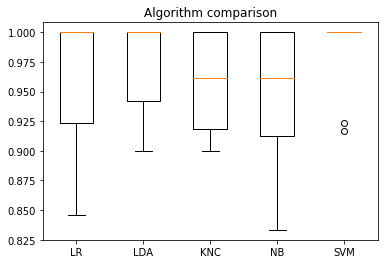

In [163]:
#Comparing models using plots
pyplot.boxplot(results,labels=names)
pyplot.title('Algorithm comparison')
pyplot.show()

In [164]:
#SVM is the best fit model

In [165]:
#Prediciton on SVM
model = SVC(gamma='auto')
model.fit(X_train,Y_train)
predictions = model.predict(X_val)

In [166]:
#evaluate predictions
print(accuracy_score(Y_val,predictions))
print(classification_report(Y_val, predictions))

0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

    avg / total       0.97      0.97      0.97        30



In [167]:
#accuracy is 96.67%
#classification report gives values of each class(species).